In [1]:
import pandas as pd
import glob
import os

## Import and consolidate csv for SPY

In [87]:
import tqdm

path = R"X:\Projects\SPY Data\Data\Consol\cmd_csv"
all_files = glob.iglob(os.path.join(path, "*.csv"))
li = []
col_names = ["ID", "Ticker","Expiration","Ask","Asize","Bid","Bsize","Last","Type","Strike","Vol","OpenInterest","Underlying","DataDate"]

for f in tqdm.notebook.tqdm(all_files):
    try:
        df = pd.read_csv(f, index_col=None, skiprows=1, names=col_names, parse_dates=["Expiration", "DataDate"])
        df = df[df["Ticker"]=="SPY"]
        li.append(df)
        print("Finished " + str(f))
    except:
        print("NO SPY NO SPY" + str(f))

cts\SPY Data\Data\Consol\cmd_csv\D_20201104_OData1.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201104_OData2.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201105_OData1.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201105_OData2.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201106_OData1.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201106_OData2.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201109_OData1.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201109_OData2.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201110_OData1.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201110_OData2.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201111_OData1.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201111_OData2.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201112_OData1.csv
Finished X:\Projects\SPY Data\Data\Consol\cmd_csv\D_20201112_OData2.csv
Finished 

In [88]:
# join all the csvs together once consolidated

frame = pd.concat(li, axis=0, ignore_index = True)

## Reading the pickle file

In [18]:
frame = pd.read_pickle(R"X:\GitHub\beatingENd\BeatingEnDUS\SPY Works\SPY_options.pickle")

In [44]:
truncated = frame.loc[0:100000]

In [19]:
frame["DataDate"] = pd.to_datetime(frame["DataDate"])
frame = frame.sort_values(by="DataDate").reset_index()

In [3]:
from datetime import timedelta
from datetime import date

# create a truncated test kit

truncated = frame.head(n = 100000)
truncated["DataDate"] = pd.to_datetime(truncated["DataDate"])
truncated = truncated.sort_values(by="DataDate").reset_index()
truncated["DTE"] = truncated["Expiration"]- truncated["DataDate"]
truncated[["oid", "iddate"]] = truncated["ID"].str.split(pat=".", expand=True)

<ipython-input-3-d019f961a97e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truncated["DataDate"] = pd.to_datetime(truncated["DataDate"])


In [10]:
truncated[(truncated["DTE"] == timedelta(currDTE)) & (truncated["Strike"] == 288) & (truncated["Type"] == "put")]

,index,ID,Ticker,Expiration,Ask,Asize,Bid,Bsize,Last,Type,Strike,Vol,OpenInterest,Underlying,DataDate,DTE
11501,21990,SPY2019-06-14P288.002019-06-07,SPY,2019-06-14,2.35,1,2.34,269,2.35,put,288.0,11647,3584,287.65,2019-06-07,7 days
17572,29915,SPY2019-06-17P288.002019-06-10,SPY,2019-06-17,1.62,500,1.59,303,1.60,put,288.0,3368,586,288.97,2019-06-10,7 days
34258,45160,SPY2019-06-19P288.002019-06-12,SPY,2019-06-19,1.91,237,1.88,180,2.00,put,288.0,7101,5233,288.39,2019-06-12,7 days
45770,61338,SPY2019-06-21P288.002019-06-14,SPY,2019-06-21,1.90,122,1.88,275,1.89,put,288.0,11547,45986,289.26,2019-06-14,7 days
52945,68948,SPY2019-06-24P288.002019-06-17,SPY,2019-06-24,1.89,309,1.86,100,1.99,put,288.0,393,661,289.37,2019-06-17,7 days
72326,83815,SPY2019-06-26P288.002019-06-19,SPY,2019-06-26,0.70,140,0.69,889,0.65,put,288.0,1361,2510,293.06,2019-06-19,7 days
85144,94498,SPY2019-07-01P288.002019-06-24,SPY,2019-07-01,0.85,394,0.83,951,0.89,put,288.0,941,4437,293.64,2019-06-24,7 days
91690,543,SPY2019-08-07p288.002019-07-31,SPY,2019-08-07,0.66,417,0.64,888,0.60,put,288.0,981,492,297.43,2019-07-31,7 days
98169,7009,SPY2019-10-07p288.002019-09-30,SPY,2019-10-07,0.29,0,1870.00,339,0.34,put,288.0,662,831,296.77,2019-09-30,7 days


In [121]:
curr_trade = truncated[(truncated["DataDate"] == truncated["DataDate"].min() + timedelta(1)) & (truncated["Strike"] == 288) & (truncated["Type"] == "put") & (truncated["DTE"] < timedelta(5)) & (truncated["DTE"] > timedelta(1))]["oid"].values[0]

In [122]:
truncated[truncated["oid"] == curr_trade]

,index,ID,Ticker,Expiration,Ask,Asize,Bid,Bsize,Last,Type,Strike,Vol,OpenInterest,Underlying,DataDate,DTE,oid,iddate
4712,14196,SPY2019-06-10P288.002019-06-06,SPY,2019-06-10,3.60,340,3.40,380,3.11,put,288.0,37,23,284.80,2019-06-06,4 days,SPY2019-06-10P288,002019-06-06
11353,21506,SPY2019-06-10P288.002019-06-07,SPY,2019-06-10,1.31,349,1.28,55,1.30,put,288.0,36598,45,287.65,2019-06-07,3 days,SPY2019-06-10P288,002019-06-07
14648,28924,SPY2019-06-10P288.002019-06-10,SPY,2019-06-10,0.01,4475,0.00,0,0.01,put,288.0,50018,8721,288.97,2019-06-10,0 days,SPY2019-06-10P288,002019-06-10
27328,36130,SPY2019-06-10P288.002019-06-11,SPY,2019-06-10,0.01,3403,0.00,0,0.01,put,288.0,0,14238,288.90,2019-06-11,-1 days,SPY2019-06-10P288,002019-06-11
29824,43552,SPY2019-06-10P288.002019-06-12,SPY,2019-06-10,0.01,3403,0.00,0,0.01,put,288.0,0,14238,288.39,2019-06-12,-2 days,SPY2019-06-10P288,002019-06-12
40804,51198,SPY2019-06-10P288.002019-06-13,SPY,2019-06-10,0.01,3403,0.00,0,0.01,put,288.0,0,14238,289.58,2019-06-13,-3 days,SPY2019-06-10P288,002019-06-13
49947,58688,SPY2019-06-10P288.002019-06-14,SPY,2019-06-10,0.01,3403,0.00,0,0.01,put,288.0,0,14238,289.26,2019-06-14,-4 days,SPY2019-06-10P288,002019-06-14
55897,66050,SPY2019-06-10P288.002019-06-17,SPY,2019-06-10,0.01,3403,0.00,0,0.01,put,288.0,0,14238,289.37,2019-06-17,-7 days,SPY2019-06-10P288,002019-06-17
61244,73220,SPY2019-06-10P288.002019-06-18,SPY,2019-06-10,0.01,3403,0.00,0,0.01,put,288.0,0,14238,292.40,2019-06-18,-8 days,SPY2019-06-10P288,002019-06-18
71248,80507,SPY2019-06-10P288.002019-06-19,SPY,2019-06-10,0.01,3403,0.00,0,0.01,put,288.0,0,14238,293.06,2019-06-19,-9 days,SPY2019-06-10P288,002019-06-19


## Testing backtesting functions

In [2]:
from helper import Trade, AccountBal, TradeOperations
from datetime import timedelta
from datetime import date

truncated = pd.read_pickle("SPY.pickle")
# put_df = truncated.drop("index", axis=1).set_index("oid")

In [28]:
test = truncated.iloc[90000:600000,:]

In [124]:
import sqlite3

conn = sqlite3.connect("SPYOptions.db")
cur = conn.cursor()

import datetime
thedate = datetime.datetime(2020, 1, 1).strftime('%Y-%m-%d %H:%M:%S')

sql = """SELECT oid FROM Merged WHERE DataDate='2020-07-31 00:00:00' LIMIT 10"""

cur.execute(sql)
data = cur.fetchall()

for ata in data:
    print(ata)

In [11]:
start_date = truncated["DataDate"].min()+timedelta(1)

days = []

def run_backtest(curr_date, dataset):

    curr_account = AccountBal(100)
    tradeOn = False

    while curr_date < dataset["DataDate"].max(): # loop through the days
        curr_date += timedelta(1)
        days.append(curr_date)
        daily_set = dataset[dataset["DataDate"] == curr_date]
        if tradeOn == False: # if there is no trade on, we want to search for a trade
            try:
                new_trade = Trade(TradeOperations.find_trade(daily_set)) # create new trade class
                curr_account.add_trade(new_trade.get_value())
                curr_account.account_bal.append(curr_account.value)
                tradeOn = True
            except:
                print(str(curr_date) + " is a Weekend, unable to open")
                curr_account.account_bal.append(curr_account.value)
            
        elif tradeOn == True:
            try:
                if new_trade.exp-timedelta(0) == curr_date:
                    new_trade.update_trade(daily_set[daily_set["oid"] == new_trade.id]["Ask"].values[0])
                    curr_account.add_trade(-new_trade.get_value())
                    print(str(curr_date) + " New Trade Added " + str(new_trade.id))
                    new_trade = Trade(TradeOperations.find_trade(daily_set))
                    curr_account.add_trade(new_trade.get_value())
                else:
                    print(str(curr_date) + " No Trades Running " + str(new_trade.id))
                    curr_account.account_bal.append(curr_account.value)
                pass
            except:
                print(str(curr_date) + " ERROR: Closing Trade Manually ")
                new_trade.update_trade(float(new_trade.get_value())/2)
                curr_account.add_trade(-new_trade.get_value())
                tradeOn = False
                    
    return curr_account.trade_val, curr_account.account_bal

In [12]:
pl, bal = run_backtest(start_date, truncated)

2020-05-11P284
2020-05-07 00:00:00 No Trades Running SPY2020-05-11P284
2020-05-08 00:00:00 No Trades Running SPY2020-05-11P284
2020-05-09 00:00:00 No Trades Running SPY2020-05-11P284
2020-05-10 00:00:00 No Trades Running SPY2020-05-11P284
2020-05-11 00:00:00 New Trade Added SPY2020-05-11P284
2020-05-12 00:00:00 No Trades Running SPY2020-05-18P292
2020-05-13 00:00:00 No Trades Running SPY2020-05-18P292
2020-05-14 00:00:00 No Trades Running SPY2020-05-18P292
2020-05-15 00:00:00 No Trades Running SPY2020-05-18P292
2020-05-16 00:00:00 No Trades Running SPY2020-05-18P292
2020-05-17 00:00:00 No Trades Running SPY2020-05-18P292
2020-05-18 00:00:00 New Trade Added SPY2020-05-18P292
2020-05-19 00:00:00 No Trades Running SPY2020-05-26P295
2020-05-20 00:00:00 No Trades Running SPY2020-05-26P295
2020-05-21 00:00:00 No Trades Running SPY2020-05-26P295
2020-05-22 00:00:00 No Trades Running SPY2020-05-26P295
2020-05-23 00:00:00 No Trades Running SPY2020-05-26P295
2020-05-24 00:00:00 No Trades Running

In [26]:
acc_real = bal[0:-1]

In [27]:
output = pd.DataFrame({"Date" : days, "Balance": acc_real})

In [30]:
output["Date"] = pd.to_datetime(output["Date"])

In [35]:
import plotly.express as px
import numpy as np 

px.line(output, x="Date", y="Balance", title="ATM Put, constant rolling")

In [56]:
import quantstats as qs

returns = pd.Series(acc_real).pct_change(1)

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2019-06-08  2019-06-08
End Period          2021-05-18  2021-05-18
Risk-Free Rate      0.0%        0.0%
Time in Market      14.0%       69.0%

Cumulative Return   49.59%      48.48%
CAGR%               23.0%       22.53%

Sharpe              0.59        0.77
Sortino             0.71        1.05
Sortino/√2          0.5         0.74

Max Drawdown        -66.07%     -33.72%
Longest DD Days     316         172

Gain/Pain Ratio     0.46        0.21
Gain/Pain (1M)      0.95        1.67

Payoff Ratio        0.4         0.41
Profit Factor       1.46        1.21
Common Sense Ratio  inf         1.06
CPC Index           0.45        0.28
Tail Ratio          inf         0.88
Outlier Win Ratio   14.12       8.82
Outlier Loss Ratio  0.61        4.24

MTD                 -4.53%      -1.28%
3M                  4.75%       5.26%
6M                  31.49%      15.9%
YTD                 16.15%      10

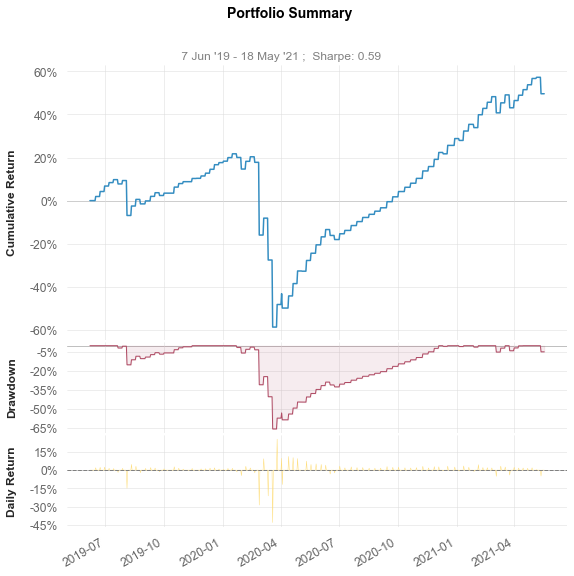

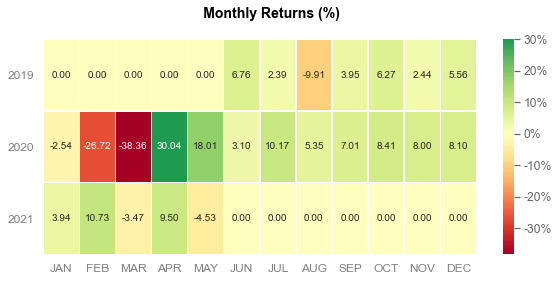

In [84]:
qs.reports.basic(quant_series, "SPY")